In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import data
df = pd.read_csv("medical_examination.csv")

In [4]:
# Add 'overweight' column
bmi = df.weight / (df.height/100)**2
overweight = bmi.apply(lambda x: 1 if(x>25) else 0) 
df['overweight'] = overweight

In [5]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df.cholesterol.apply(lambda x: 1 if(x > 1) else 0)
df['gluc'] = df.gluc.apply(lambda x: 1 if(x > 1) else 0)

In [30]:
# Draw Categorical Plot
def draw_cat_plot():
        '''Create DataFrame for cat plot using `pd.melt` using just the 
        #values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 
        and 'overweight'. '''
        #df_cat = df[['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke', 'cardio']]
        df_cat = pd.melt(df, id_vars = ['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc','overweight', 'smoke']) 
        fig = sns.catplot(x='variable',
                  col='cardio',
                  hue='value',
                  kind='count',
                  data=df_cat)
        fig.set(ylabel='total')


        # Do not modify the next two lines
        # fig.savefig('catplot.png')
        return fig
        

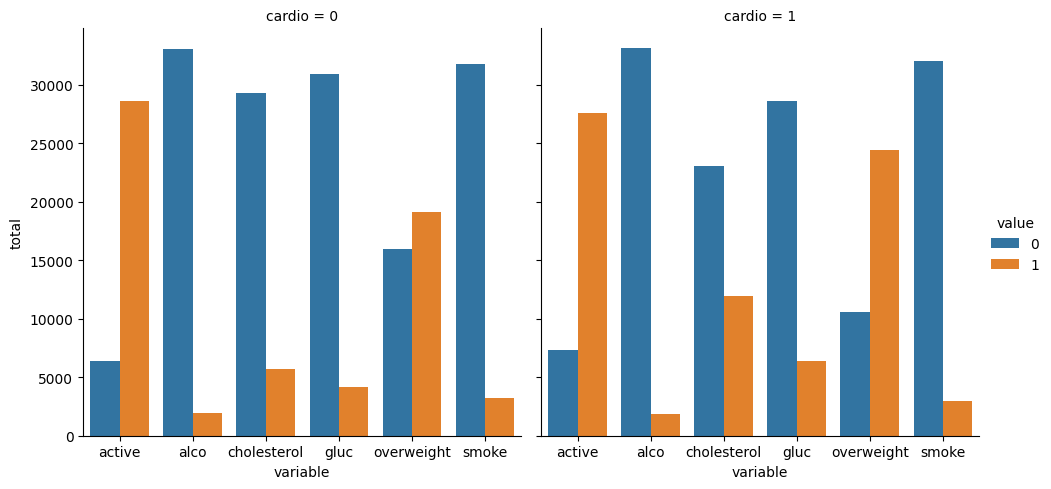

In [31]:
draw_cat_plot()

In [58]:
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]
    # df_heat.rename(columns={'sex':'gender'}, inplace=True)

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)


    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(8,7))
    
                          
    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr.round(1),annot=True, mask=mask, vmin=-0.15, 
                vmax=0.3, center=0, linewidth=.03, fmt=".1f",
                cbar_kws={"shrink": .5,"ticks": [-0.08, 0.00, 0.08, 0.16, 0.24]},
              )


    # Do not modify the next two lines
    # fig.savefig('heatmap.png')
    # return fig


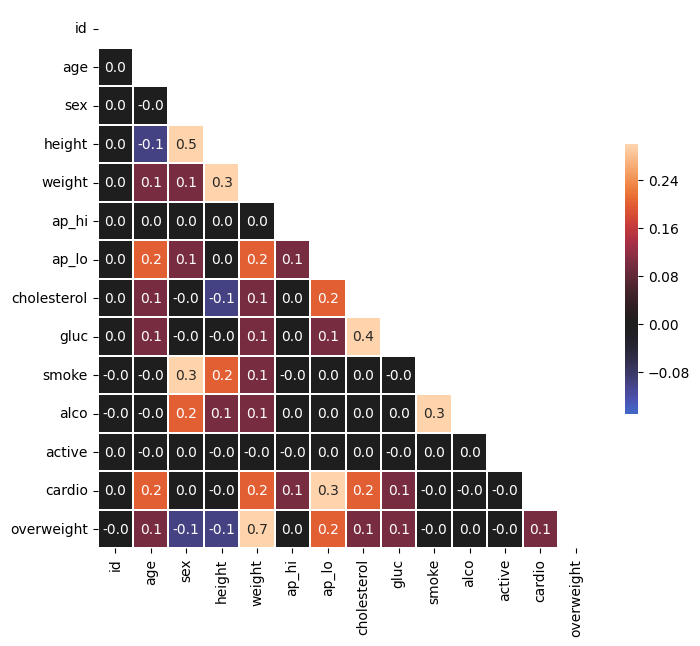

In [59]:
draw_heat_map()

https://www.youtube.com/watch?v=j1l9XdsiHBo&ab_channel=LandonSchlangen
left off 6:15
Everything is good, just heatmap values are off